<a href="https://colab.research.google.com/github/gavincapriola/PyTorch-Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the dataset

In [1]:
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.8/703.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 100.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.5.0+cu101 which is incompatible.
torchaudio 0.13.1+cu116 requires torch=

In [2]:
import torch
torch.__version__

'1.5.0+cu101'

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

In [4]:
diabetes = pd.read_csv('diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
inputs = diabetes.iloc[:, 0:8].values
inputs.shape

(768, 8)

In [7]:
inputs

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)

In [9]:
inputs

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [10]:
outputs = diabetes.iloc[:,8].values
outputs

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [11]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.20)

In [12]:
X_train.shape

(614, 8)

In [13]:
X_test.shape

(154, 8)

## Data transformation


In [14]:
type(X_train)

numpy.ndarray

In [15]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype = torch.float)

In [16]:
type(X_train)

torch.Tensor

In [17]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [18]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [19]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10)

## Neural network structure

In [20]:
(8 + 1) / 2

4.5

In [21]:
# 8 -> 5 -> 5 -> 1
network = nn.Sequential(nn.Linear(8, 5),
                          nn.Sigmoid(),
                          nn.Linear(5, 5),
                          nn.Sigmoid(),
                          nn.Linear(5, 1),
                          nn.Sigmoid())

In [22]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=8, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [23]:
loss_function = nn.BCELoss()

In [24]:
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

In [25]:
epochs = 2000
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    inputs, outputs = data
    optimizer.zero_grad()

    predictions = network.forward(inputs)
    loss = loss_function(predictions, outputs)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Epoch %3d: loss %.5f' % (epoch+1, running_loss/len(train_loader)))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch   1: loss 0.65543
Epoch   2: loss 0.65436
Epoch   3: loss 0.65059
Epoch   4: loss 0.64332
Epoch   5: loss 0.62949
Epoch   6: loss 0.60743
Epoch   7: loss 0.58187
Epoch   8: loss 0.56008
Epoch   9: loss 0.54404
Epoch  10: loss 0.53226
Epoch  11: loss 0.52323
Epoch  12: loss 0.51605
Epoch  13: loss 0.51020
Epoch  14: loss 0.50532
Epoch  15: loss 0.50118
Epoch  16: loss 0.49762
Epoch  17: loss 0.49453
Epoch  18: loss 0.49183
Epoch  19: loss 0.48945
Epoch  20: loss 0.48735
Epoch  21: loss 0.48550
Epoch  22: loss 0.48385
Epoch  23: loss 0.48237
Epoch  24: loss 0.48104
Epoch  25: loss 0.47983
Epoch  26: loss 0.47871
Epoch  27: loss 0.47768
Epoch  28: loss 0.47671
Epoch  29: loss 0.47580
Epoch  30: loss 0.47493
Epoch  31: loss 0.47411
Epoch  32: loss 0.47332
Epoch  33: loss 0.47256
Epoch  34: loss 0.47183
Epoch  35: loss 0.47112
Epoch  36: loss 0.47044
Epoch  37: loss 0.46979
Epoch  38: loss 0.46915
Epoch  39: loss 0.46854
Epoch  40: loss 0.46795
Epoch  41: loss 0.46738
Epoch  42: loss 

## Evaluate

In [26]:
network.eval()

Sequential(
  (0): Linear(in_features=8, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)

In [27]:
X_test = torch.tensor(X_test, dtype=torch.float)

In [28]:
predictions = network.forward(X_test)

In [29]:
predictions

tensor([[4.1369e-01],
        [2.5028e-01],
        [5.3634e-01],
        [5.0925e-09],
        [9.8598e-01],
        [4.0122e-01],
        [8.8442e-01],
        [9.8808e-01],
        [3.4753e-11],
        [6.3060e-09],
        [1.4608e-02],
        [1.2662e-01],
        [9.5125e-03],
        [4.4396e-08],
        [1.5916e-12],
        [8.5030e-01],
        [1.0638e-01],
        [1.1214e-01],
        [2.5317e-01],
        [5.1227e-01],
        [1.3426e-05],
        [2.9952e-01],
        [1.8163e-06],
        [3.7404e-01],
        [9.9967e-01],
        [1.1437e-09],
        [1.3392e-08],
        [9.7609e-10],
        [7.7915e-01],
        [5.8739e-03],
        [4.6114e-01],
        [9.1269e-01],
        [2.4174e-02],
        [5.2128e-01],
        [3.4926e-01],
        [1.8377e-02],
        [9.0878e-01],
        [8.4739e-01],
        [1.2232e-04],
        [1.0988e-01],
        [5.4782e-08],
        [8.1368e-01],
        [1.0600e-01],
        [7.0715e-02],
        [6.9196e-04],
        [3

In [30]:
predictions = (predictions >= 0.5)
predictions

tensor([[False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False

In [31]:
y_test

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [32]:
accuracy_score(y_test, predictions.detach().numpy())

0.7662337662337663

In [33]:
cm = confusion_matrix(y_test, predictions.detach().numpy())
cm

array([[93, 14],
       [22, 25]])

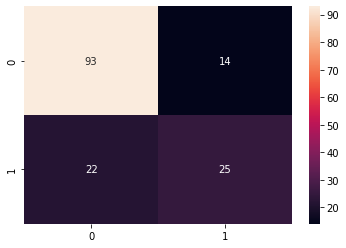

In [34]:
import seaborn as sns
sns.heatmap(cm, annot=True)